In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
# from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
# from scipy.spatial import distance
# import xml.etree.ElementTree as ET
# from shapely.geometry import Polygon, LineString
# import carla
import os
# from datetime import datetime
# import time
import random
from tqdm import tqdm
import networkx as nx
import numpy as np
import pickle
# from graph_creator.MapGraph import MapGraph
from graph_creator.utilities import make_node_edge_df
from subgraphs.SubgraphIsomorphismChecker import IsomorphicGrapCoverageCounter
from subgraphs.subgraph_types import get_all_subgraphs

os.chdir('../..')
print(os.getcwd())

#from graph_creator.MapGraph import MapGraph
#from graph_creator.ActorGraph import ActorGraph
from graph_creator.plot_graphs import plot_lane_map_advanced, add_actors_to_map, add_actor_edges_to_map
from glob import glob

graph_paths_carla = glob("/home/tmuehlen/repos/graph_coverage/actor_graphs/carla_w_intersection/*pkl")
len(graph_paths_carla)

/Users/marius/code/graph_coverage


ImportError: cannot import name 'plot_lane_map_advanced' from 'graph_creator.plot_graphs' (/Users/marius/code/graph_coverage/graph_creator/plot_graphs.py)

In [ ]:
graph_paths_argo = glob("/home/tmuehlen/repos/graph_coverage/actor_graphs/argoverse_nx/*pkl")
graph_paths_argo = glob("/home/tmuehlen/repos/graph_coverage/actor_graphs/argoverse_components_nx/*pkl")

len(graph_paths_argo)

14726

### Start comparing graphs by randomly picking some:

In [ ]:
# Define a random set of coverage situations with 3 nodes each
# This still needs to be replaced by more strategically selected graphs

#idxs = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
idxs = random.sample(list(range(len(graph_paths_carla))), 10)

coverage_graphs = {}
cov_data = {}


for idx in idxs:
    graph_path = graph_paths_carla[idx]
    with open(graph_path, "rb") as file:
        ag_nx = pickle.load(file)
    #random.sample(ag_nx.nodes, 3)
    if ag_nx.number_of_nodes() > 2:
        coverage_graphs[idx] = ag_nx.subgraph(random.sample(list(ag_nx.nodes), 3))
        # cov_data[idx] = []


In [ ]:
isom_cov_counter = IsomorphicGrapCoverageCounter(coverage_graphs, graph_paths_carla[:100], node_match = ["actor_type", "lane_change", "is_on_intersection"], edge_match = ["edge_type"])
isom_cov_counter.count_isomorphic_graphs()
cov_data_df = isom_cov_counter.cov_data_df

Checking isomorphic graphs: 100%|██████████| 100/100 [00:00<00:00, 504.51it/s]


In [ ]:
cov_data_df.head(2)

,2287,4101,4788,10757,5951,degree,density,diameter,path
0,False,False,False,False,False,2.0,1.0,1,/home/tmuehlen/repos/graph_coverage/actor_grap...
1,False,False,False,False,False,2.0,1.0,1,/home/tmuehlen/repos/graph_coverage/actor_grap...


In [ ]:
cov_data_df.mean(numeric_only=True)


2287        0.300000
4101        0.230000
4788        0.300000
10757       0.230000
5951        0.140000
degree      2.757233
density     0.803521
diameter    1.820000
dtype: float64

In [ ]:
cov_data_df.groupby(list(cov_data_df.columns[:(cov_data_df.shape[1] - 3)]), as_index=False).size()


,2287,4101,4788,10757,5951,degree,size
0,False,False,False,False,False,2.000000,55
1,False,False,False,False,False,2.666667,7
2,False,False,False,False,False,4.000000,5
3,False,True,False,True,False,3.200000,2
4,False,True,False,True,False,4.000000,1
5,True,False,True,False,False,2.666667,9
6,True,False,True,False,False,4.000000,1
7,True,True,True,True,False,3.000000,3
8,True,True,True,True,False,3.200000,1
9,True,True,True,True,False,4.000000,2


In [ ]:
coverage_graphs

{2287: <networkx.classes.multidigraph.MultiDiGraph at 0x769004a835e0>,
 4101: <networkx.classes.multidigraph.MultiDiGraph at 0x769004a810f0>,
 4788: <networkx.classes.multidigraph.MultiDiGraph at 0x769004a81270>,
 10757: <networkx.classes.multidigraph.MultiDiGraph at 0x769004a80bb0>,
 5951: <networkx.classes.multidigraph.MultiDiGraph at 0x768f38139d80>}

### define some situations manually

In [ ]:
# Load all predefined subgraph types
coverage_graphs = get_all_subgraphs()

In [20]:
coverage_graphs

{'lead_vehicle_in_front_with_neighbor_vehicle': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b2a70>,
 'lead_vehicle_in_front_with_neighbor_vehicle_intersection': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b32e0>,
 'lead_vehicle_in_front_following_vehicle_in_the_back': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b3b20>,
 'cut_in': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b3e80>,
 'cut_in_intersection': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b0100>,
 'cut_out': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b3130>,
 'cut_out_intersection': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b3310>,
 'lead_neighbor_opposite_vehicle': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b3e20>,
 'lead_neighbor_opposite_vehicle_intersection': <networkx.classes.multidigraph.MultiDiGraph at 0x768f381b1cf0>}

In [21]:
len(graph_paths_carla)


14099

In [ ]:
n_check_graphs = 5000
isom_cov_counter_carla = IsomorphicGrapCoverageCounter(coverage_graphs, graph_paths_carla[:n_check_graphs], node_match = ["actor_type", "lane_change", "is_on_intersection"], edge_match = ["edge_type"])
isom_cov_counter_carla.count_isomorphic_graphs()
cov_data_df_carla = isom_cov_counter_carla.cov_data_df
cov_data_df_carla.head(10)

Checking isomorphic graphs: 100%|██████████| 5000/5000 [00:19<00:00, 256.91it/s]


,lead_vehicle_in_front_with_neighbor_vehicle,lead_vehicle_in_front_with_neighbor_vehicle_intersection,lead_vehicle_in_front_following_vehicle_in_the_back,cut_in,cut_in_intersection,cut_out,cut_out_intersection,lead_neighbor_opposite_vehicle,lead_neighbor_opposite_vehicle_intersection,degree,density,diameter,path
0,False,False,False,False,False,False,False,False,False,2.000000,1.000000,1,/home/tmuehlen/repos/graph_coverage/actor_grap...
1,False,False,False,False,False,False,False,False,False,2.000000,1.000000,1,/home/tmuehlen/repos/graph_coverage/actor_grap...
2,False,False,False,False,False,False,False,False,False,2.000000,1.000000,1,/home/tmuehlen/repos/graph_coverage/actor_grap...
3,True,False,True,False,False,False,False,False,False,2.666667,0.666667,2,/home/tmuehlen/repos/graph_coverage/actor_grap...
4,False,True,False,False,False,False,False,False,False,3.200000,0.400000,3,/home/tmuehlen/repos/graph_coverage/actor_grap...
5,True,False,True,False,False,False,False,False,False,2.666667,0.666667,2,/home/tmuehlen/repos/graph_coverage/actor_grap...
6,True,False,True,False,False,False,False,False,False,3.333333,0.333333,4,/home/tmuehlen/repos/graph_coverage/actor_grap...
7,True,False,True,False,False,False,False,False,False,2.666667,0.666667,2,/home/tmuehlen/repos/graph_coverage/actor_grap...
8,False,False,False,False,False,False,False,False,False,2.000000,1.000000,1,/home/tmuehlen/repos/graph_coverage/actor_grap...
9,False,False,False,False,False,False,False,False,False,2.666667,0.666667,2,/home/tmuehlen/repos/graph_coverage/actor_grap...


In [25]:
isom_cov_counter_argo = IsomorphicGrapCoverageCounter(coverage_graphs, graph_paths_argo[:n_check_graphs], node_match = ["actor_type", "lane_change", "is_on_intersection"], edge_match = ["edge_type"])
isom_cov_counter_argo.count_isomorphic_graphs()
cov_data_df_argo = isom_cov_counter_argo.cov_data_df
cov_data_df_argo.head(5)

Checking isomorphic graphs: 100%|██████████| 5000/5000 [00:13<00:00, 377.31it/s]


,lead_vehicle_in_front_with_neighbor_vehicle,lead_vehicle_in_front_with_neighbor_vehicle_intersection,lead_vehicle_in_front_following_vehicle_in_the_back,cut_in,cut_in_intersection,cut_out,cut_out_intersection,lead_neighbor_opposite_vehicle,lead_neighbor_opposite_vehicle_intersection,degree,density,diameter,path
0,True,False,True,True,True,False,False,False,False,3.764706,0.117647,12,/home/tmuehlen/repos/graph_coverage/actor_grap...
1,True,True,True,True,True,True,False,False,False,4.235294,0.132353,6,/home/tmuehlen/repos/graph_coverage/actor_grap...
2,True,False,True,False,True,False,False,False,False,4.000000,0.181818,6,/home/tmuehlen/repos/graph_coverage/actor_grap...
3,False,False,False,False,False,False,False,False,False,2.666667,0.666667,2,/home/tmuehlen/repos/graph_coverage/actor_grap...
4,False,True,False,False,False,False,False,False,False,3.000000,0.500000,3,/home/tmuehlen/repos/graph_coverage/actor_grap...


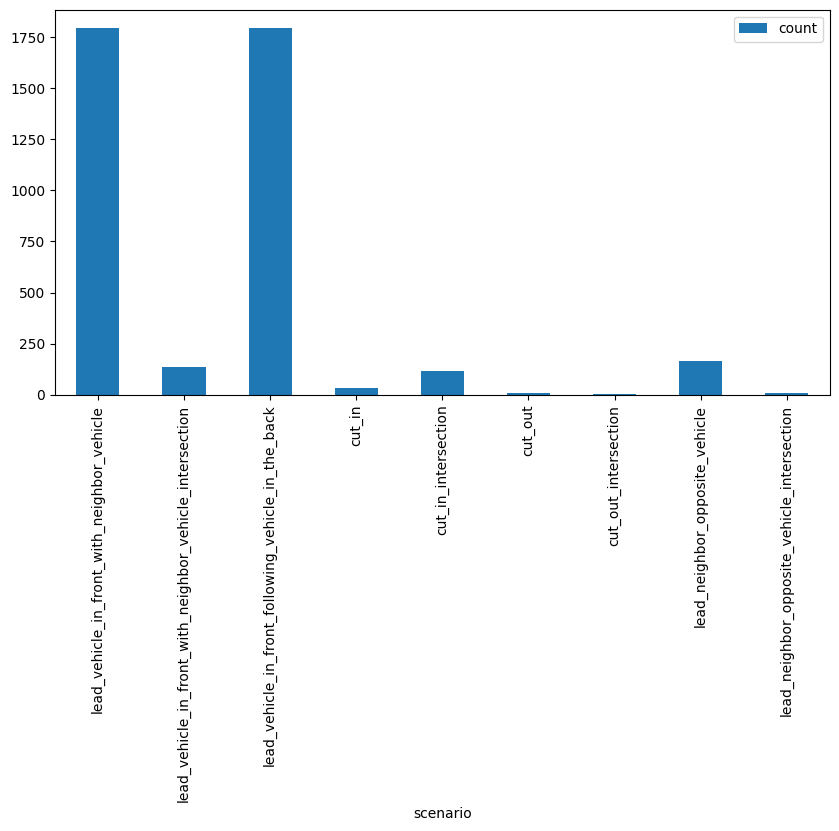

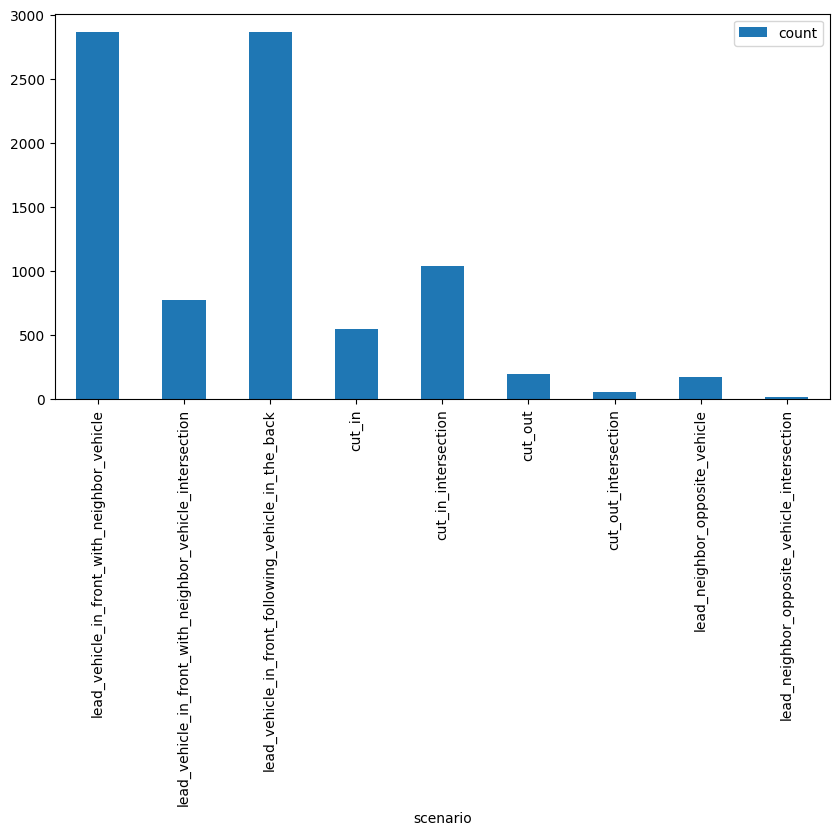

In [28]:
barchart_df = cov_data_df_carla[coverage_graphs.keys()].sum().reset_index().rename(columns={"index":"scenario", 0: "count"})
barchart_df.plot(kind="bar", x="scenario", y="count", figsize=(10, 5))
plt.savefig('article/plots/subgraph_isomorphism_carla_coverage_barchart.png', dpi=300, bbox_inches='tight')
plt.show()
barchart_df = cov_data_df_argo[coverage_graphs.keys()].sum().reset_index().rename(columns={"index":"scenario", 0: "count"})
barchart_df.plot(kind="bar", x="scenario", y="count", figsize=(10, 5))
plt.savefig('article/plots/subgraph_isomorphism_argo_coverage_barchart.png', dpi=300, bbox_inches='tight')
plt.show()

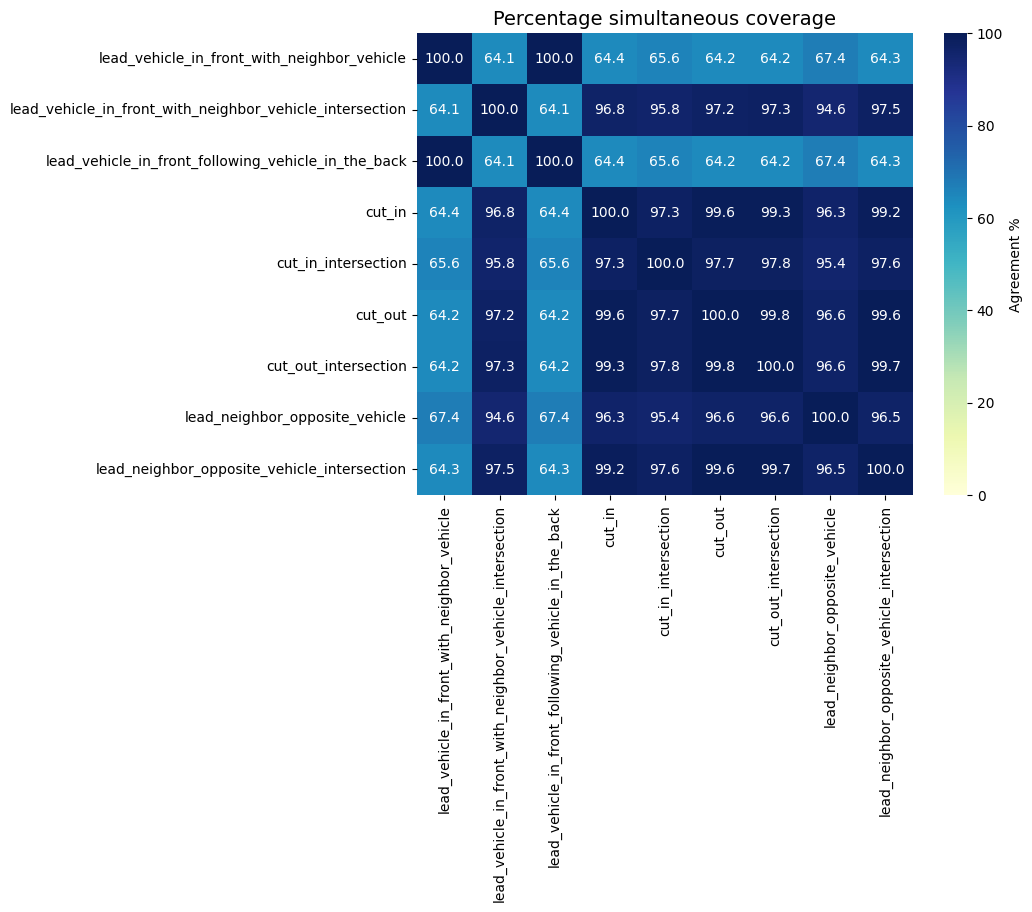

In [29]:
columns = list(coverage_graphs.keys())
# cov_data_df[coverage_graphs.keys()]
n_cols = len(columns)
agreement_matrix = np.zeros((n_cols, n_cols))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i == j:
            # Diagonal: 100% agreement with itself
            agreement_matrix[i, j] = 100
        else:
            # Calculate percentage of rows where both columns agree
            agreement = (cov_data_df_carla[col1] == cov_data_df_carla[col2]).sum() / len(cov_data_df_carla) * 100
            agreement_matrix[i, j] = agreement

# Create DataFrame for the heatmap
agreement_df = pd.DataFrame(
    agreement_matrix,
    index=columns,
    columns=columns
)
agreement_df

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(agreement_df, 
            annot=True,  # Show percentages in cells
            fmt='.1f',   # Format to 1 decimal place
            cmap='YlGnBu',  # Color scheme
            vmin=0, 
            vmax=100,
            cbar_kws={'label': 'Agreement %'})
plt.title('Percentage simultaneous coverage', fontsize=14)
#plt.tight_layout()
plt.savefig('article/plots/subgraph_isomorphism_agreement_matrix_manual_scenarios_carla.png', dpi=300, bbox_inches='tight')
plt.show()

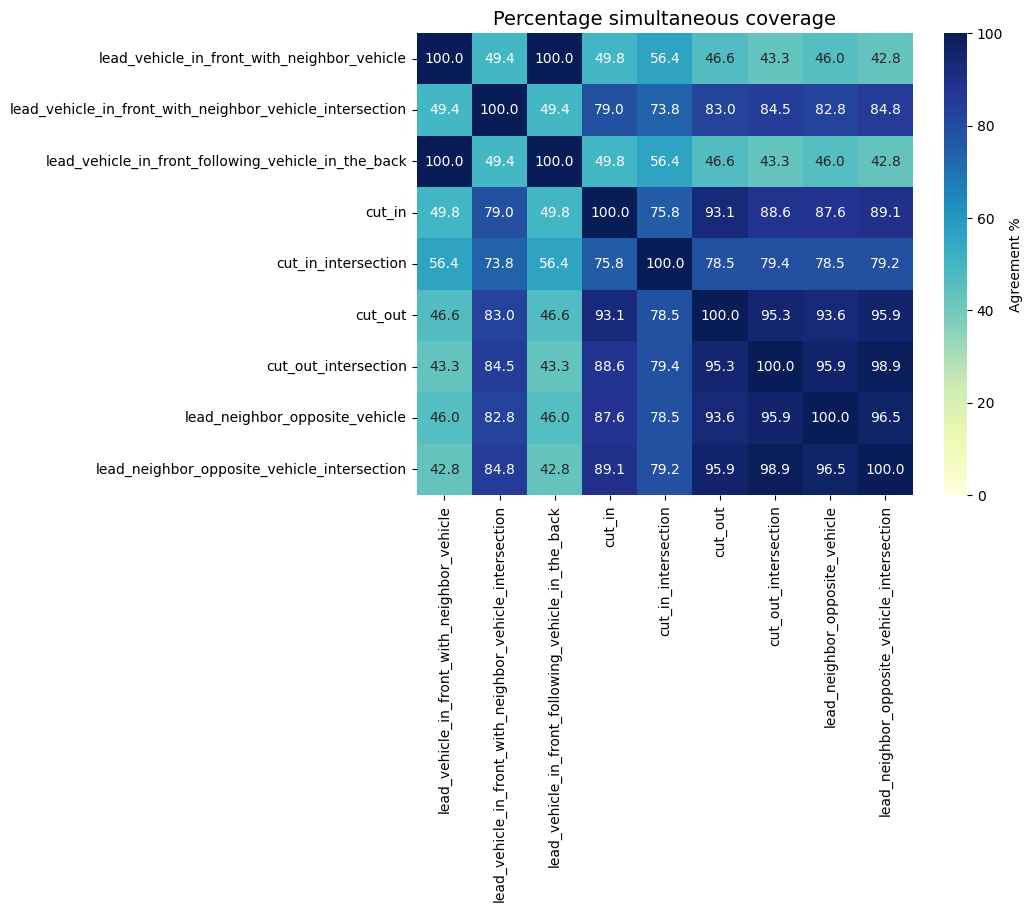

In [30]:
columns = list(coverage_graphs.keys())
# cov_data_df[coverage_graphs.keys()]
n_cols = len(columns)
agreement_matrix = np.zeros((n_cols, n_cols))

for i, col1 in enumerate(columns):
    for j, col2 in enumerate(columns):
        if i == j:
            # Diagonal: 100% agreement with itself
            agreement_matrix[i, j] = 100
        else:
            # Calculate percentage of rows where both columns agree
            agreement = (cov_data_df_argo[col1] == cov_data_df_argo[col2]).sum() / len(cov_data_df_argo) * 100
            agreement_matrix[i, j] = agreement

# Create DataFrame for the heatmap
agreement_df = pd.DataFrame(
    agreement_matrix,
    index=columns,
    columns=columns
)
agreement_df

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(agreement_df, 
            annot=True,  # Show percentages in cells
            fmt='.1f',   # Format to 1 decimal place
            cmap='YlGnBu',  # Color scheme
            vmin=0, 
            vmax=100,
            cbar_kws={'label': 'Agreement %'})
plt.title('Percentage simultaneous coverage', fontsize=14)
#plt.tight_layout()
plt.savefig('article/plots/subgraph_isomorphism_agreement_matrix_manual_scenarios_argo.png', dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# latex table, not sure, if needed...
# groupby_df = cov_data_df_carla.groupby(list(cov_data_df_carla.columns[:(len(coverage_graphs.keys()))]), as_index=False).size()
# groupby_df.columns = groupby_df.columns.str.replace('_', ' ')
# latex_table = groupby_df.to_latex(index=False, caption='My Table', 
#                           label='tab:mytable', position='htbp')

# print(latex_table)

In [33]:
coverage_graph_names = list(coverage_graphs.keys())

100%|██████████| 10/10 [00:00<00:00, 260.02it/s]


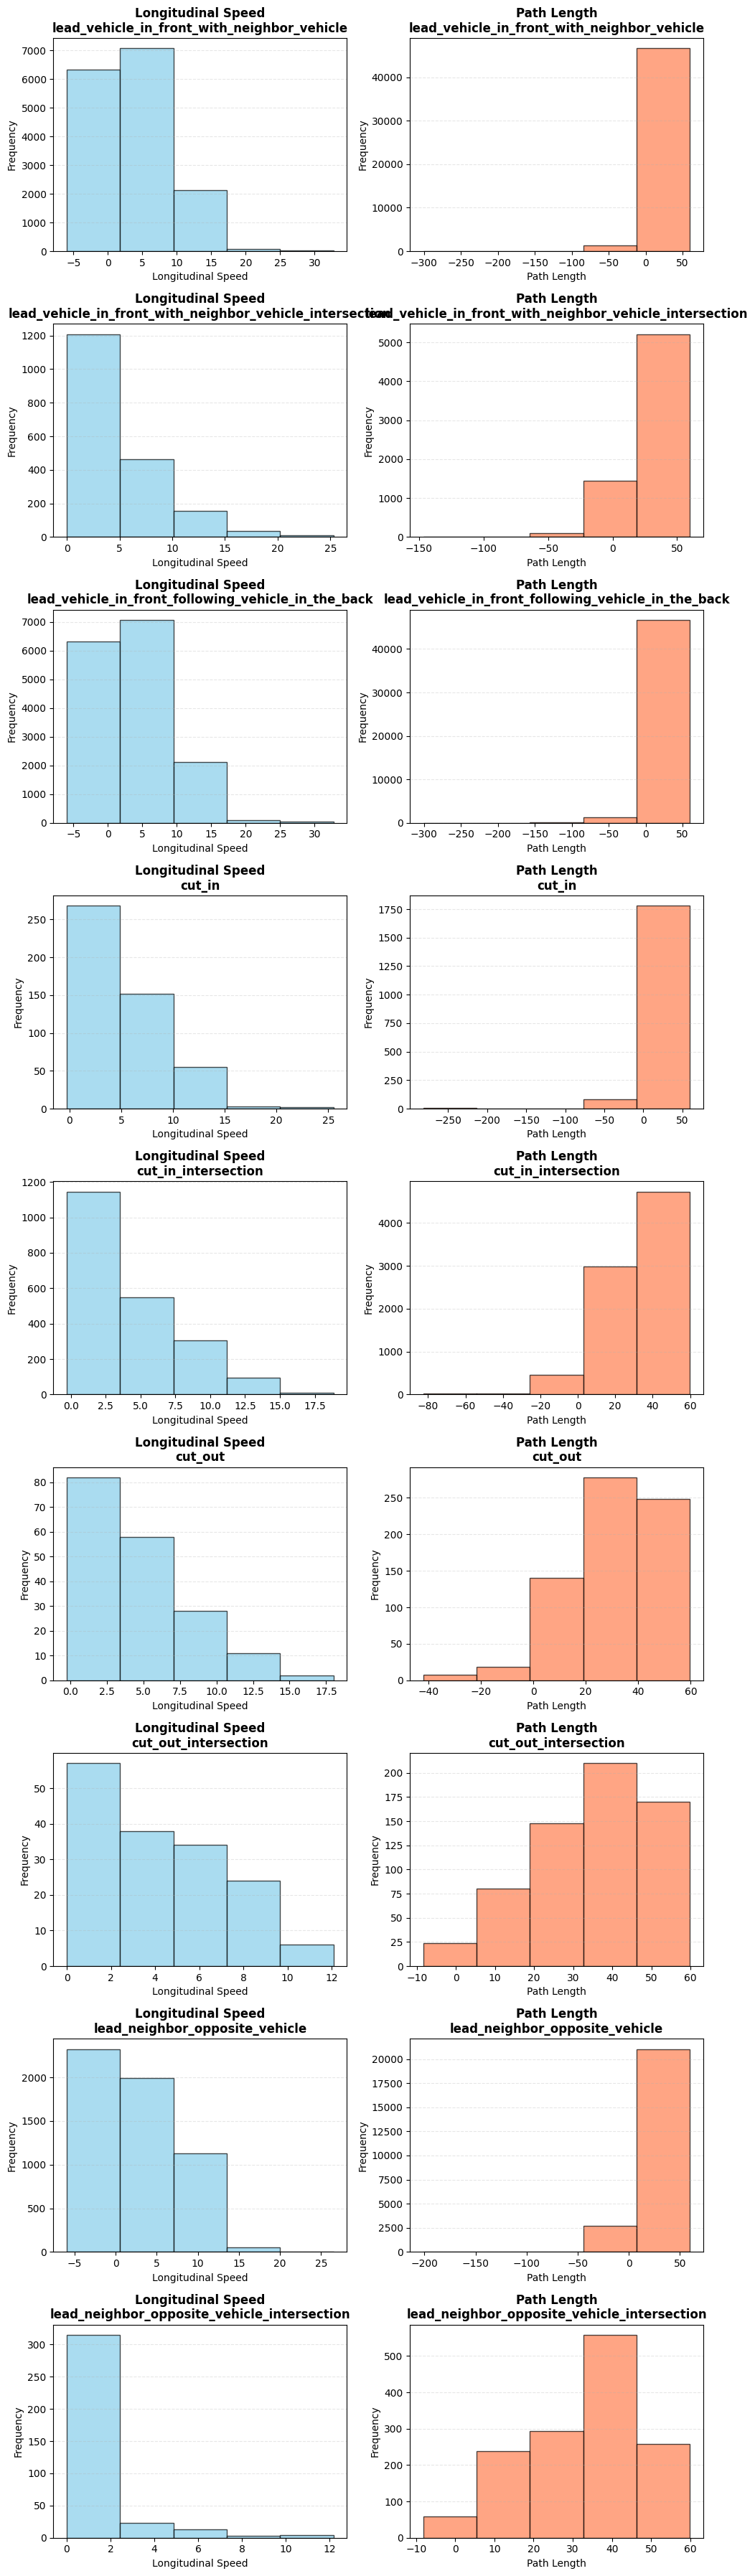

In [ ]:
# Create figure with subplots: 2 rows, columns = number of coverage_graph_names
n_rows = len(coverage_graph_names)
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4*n_rows))


for row_idx, coverage_graph_name in enumerate(coverage_graph_names):
    scn_graph_paths = cov_data_df_carla[cov_data_df_carla[coverage_graph_name]].path.to_list()
    
    # Get the speed and distances for all of the paths
    node_dfs = []
    edge_dfs = []
    for scn_graph_path in tqdm(scn_graph_paths):
        with open(scn_graph_path, "rb") as file:
            ag_nx = pickle.load(file)
        node_df, edge_df = make_node_edge_df(ag_nx)
        node_df["path"] = scn_graph_path
        edge_df["path"] = scn_graph_path
        node_dfs.append(node_df)
        edge_dfs.append(edge_df)
    
    node_df = pd.concat(node_dfs)
    edge_df = pd.concat(edge_dfs)
    
    # Plot 1: Longitudinal Speed (top row)
    node_df.lon_speed.plot(kind="hist", bins=5, ax=axes[row_idx, 0],
                           color='skyblue', edgecolor='black', alpha=0.7)
    axes[row_idx, 0].set_title(f'Longitudinal Speed\n{coverage_graph_name}', 
                                fontsize=12, fontweight='bold')
    axes[row_idx, 0].set_xlabel('Longitudinal Speed', fontsize=10)
    axes[row_idx, 0].set_ylabel('Frequency', fontsize=10)
    axes[row_idx, 0].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Plot 2: Path Length (bottom row)
    edge_df.path_length.plot(kind="hist", bins=5, ax=axes[row_idx, 1],
                             color='coral', edgecolor='black', alpha=0.7)
    axes[row_idx, 1].set_title(f'Path Length\n{coverage_graph_name}', 
                                fontsize=12, fontweight='bold')
    axes[row_idx, 1].set_xlabel('Path Length', fontsize=10)
    axes[row_idx, 1].set_ylabel('Frequency', fontsize=10)
    axes[row_idx, 1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('article/plots/combined_distributions_plots_speed_distance_carla.png', dpi=300, bbox_inches='tight')
plt.show()

100%|██████████| 9/9 [00:00<00:00, 337.76it/s]


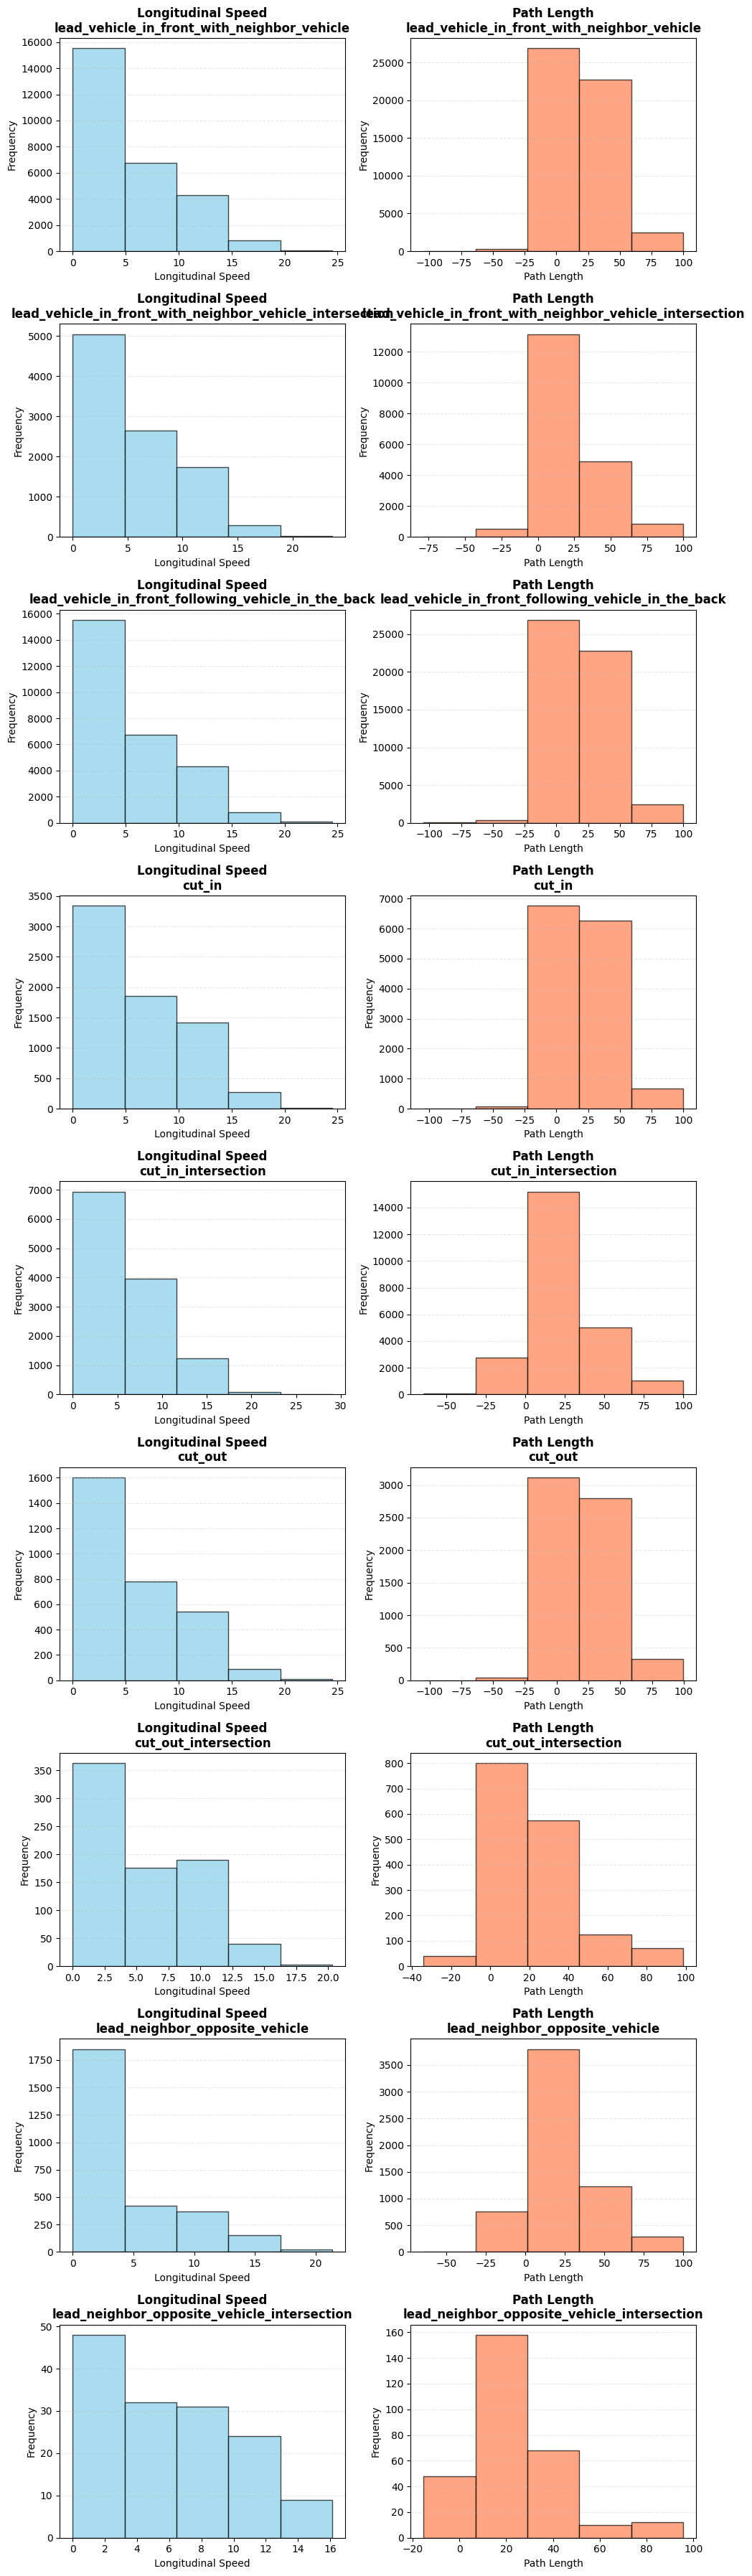

In [ ]:
# Create figure with subplots: 2 rows, columns = number of coverage_graph_names
n_rows = len(coverage_graph_names)
fig, axes = plt.subplots(n_rows, 2, figsize=(10, 4*n_rows))


for row_idx, coverage_graph_name in enumerate(coverage_graph_names):
    scn_graph_paths = cov_data_df_argo[cov_data_df_argo[coverage_graph_name]].path.to_list()
    
    # Get the speed and distances for all of the paths
    node_dfs = []
    edge_dfs = []
    for scn_graph_path in tqdm(scn_graph_paths):
        with open(scn_graph_path, "rb") as file:
            ag_nx = pickle.load(file)
        node_df, edge_df = make_node_edge_df(ag_nx)
        node_df["path"] = scn_graph_path
        edge_df["path"] = scn_graph_path
        node_dfs.append(node_df)
        edge_dfs.append(edge_df)
    
    node_df = pd.concat(node_dfs)
    edge_df = pd.concat(edge_dfs)
    
    # Plot 1: Longitudinal Speed (top row)
    node_df.lon_speed.plot(kind="hist", bins=5, ax=axes[row_idx, 0],
                           color='skyblue', edgecolor='black', alpha=0.7)
    axes[row_idx, 0].set_title(f'Longitudinal Speed\n{coverage_graph_name}', 
                                fontsize=12, fontweight='bold')
    axes[row_idx, 0].set_xlabel('Longitudinal Speed', fontsize=10)
    axes[row_idx, 0].set_ylabel('Frequency', fontsize=10)
    axes[row_idx, 0].grid(axis='y', alpha=0.3, linestyle='--')
    
    # Plot 2: Path Length (bottom row)
    edge_df.path_length.plot(kind="hist", bins=5, ax=axes[row_idx, 1],
                             color='coral', edgecolor='black', alpha=0.7)
    axes[row_idx, 1].set_title(f'Path Length\n{coverage_graph_name}', 
                                fontsize=12, fontweight='bold')
    axes[row_idx, 1].set_xlabel('Path Length', fontsize=10)
    axes[row_idx, 1].set_ylabel('Frequency', fontsize=10)
    axes[row_idx, 1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('article/plots/combined_distributions_plots_speed_distance_argo.png', dpi=300, bbox_inches='tight')
plt.show()